In [63]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [64]:
import matplotlib.pyplot as plt

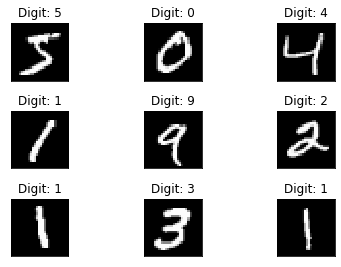

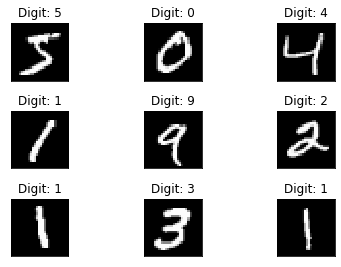

In [65]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

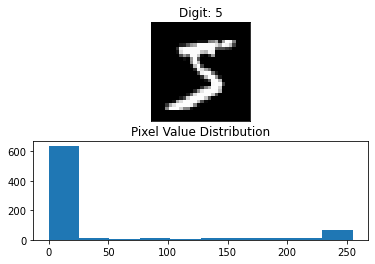

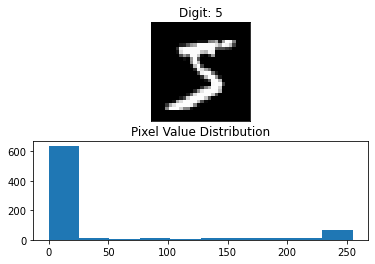

In [66]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [67]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [68]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [69]:
from keras.utils import to_categorical
import keras.utils.np_utils as np_utils
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [70]:
import os
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.layers import Activation
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

In [72]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [73]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 3s - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0818 - val_accuracy: 0.9819
Epoch 2/20
469/469 - 3s - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0817 - val_accuracy: 0.9840
Epoch 3/20
469/469 - 3s - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0933 - val_accuracy: 0.9826
Epoch 4/20
469/469 - 3s - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0897 - val_accuracy: 0.9818
Epoch 5/20
469/469 - 3s - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0954 - val_accuracy: 0.9817
Epoch 6/20
469/469 - 3s - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0896 - val_accuracy: 0.9815
Epoch 7/20
469/469 - 4s - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0753 - val_accuracy: 0.9839
Epoch 8/20
469/469 - 5s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0850 - val_accuracy: 0.9826
Epoch 9/20
469/469 - 4s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0875 - val_accuracy: 0.9822
Epoch 10/20
469/469 - 5s - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0726 - val_accuracy: 0.9850

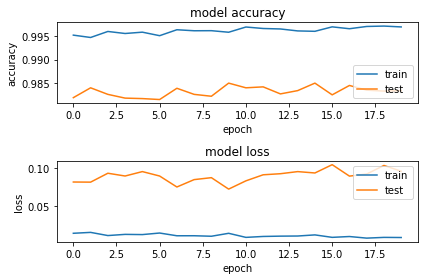

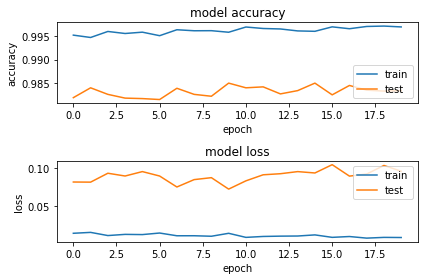

In [75]:
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test))

# saving the model
save_dir = "/results/"
os.makedirs(save_dir, exist_ok=True)
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])  # Corrected accuracy key
plt.plot(history.history['val_accuracy'])  # Corrected val_accuracy key
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()  

fig

In [80]:
from tensorflow.keras.models import load_model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(x_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


313/313 - 2s - loss: 0.0959 - accuracy: 0.9834
Test Loss 0.09586159884929657
Test Accuracy 0.9833999872207642


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

0  classified correctly
1  classified incorrectly


<ipython-input-81-5c9bbb8f6fb7>:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
<ipython-input-81-5c9bbb8f6fb7>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


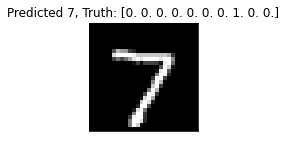

In [81]:
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(x_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])